In [1]:
#Required for accessing openml datasets from Lale
!pip install 'liac-arff>=2.4.0'

You should consider upgrading via the '/Users/kakateus.ibm.com/anaconda3/bin/python -m pip install --upgrade pip' command.


### Dataset with class imbalance

In [2]:
import lale.datasets.openml
import pandas as pd
(train_X, train_y), (test_X, test_y) = lale.datasets.openml.fetch(
    'breast-cancer', 'classification', preprocess=True)

In [3]:
import numpy as np
np.bincount(train_y)

array([140,  51])

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.kernel_approximation import Nystroem as Nys
from lale.lib.lale import NoOp
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble.forest import RandomForestClassifier
from xgboost import XGBClassifier
from lale.lib.lale import Hyperopt
from lale.lib.imblearn import SMOTE, CondensedNearestNeighbour, SMOTEENN
from sklearn.metrics import accuracy_score
import lale
lale.wrap_imported_operators()

/Users/kakateus.ibm.com/anaconda3/lib/python3.7/site-packages/pyparsing.py:3174: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


### A pipeline without any imbalance correction

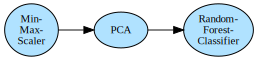

In [5]:
pipeline_without_correction =  MinMaxScaler() >> PCA() >> RandomForestClassifier()
pipeline_without_correction.visualize()

In [6]:
optimizer = Hyperopt(estimator=pipeline_without_correction, max_evals = 10, scoring='roc_auc')
trained_optimizer = optimizer.fit(np.array(train_X), np.array(train_y))
predictions = trained_optimizer.predict(test_X)
trained_optimizer.summary()

100%|██████████| 10/10 [00:18<00:00,  1.90s/trial, best loss: -0.6403571428571428]


,tid,loss,time,log_loss,status
name,,,,,
p0,0,NaN,NaN,NaN,fail
p1,1,-0.640357,0.357025,0.566292,ok
p2,2,-0.582403,0.362211,0.609279,ok
p3,3,-0.551688,0.309376,0.599048,ok
p4,4,-0.631656,0.350106,0.576526,ok
p5,5,NaN,NaN,NaN,fail
p6,6,-0.500000,0.497362,0.580290,ok
p7,7,NaN,NaN,NaN,fail
p8,8,-0.500000,0.386382,0.580199,ok


0.6421052631578947


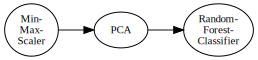

In [7]:
print(accuracy_score(test_y, predictions))
best_estimator = trained_optimizer.get_pipeline()
best_estimator.visualize()

### Over-sampling from imbalanced-learn

In [8]:
pipeline_with_correction =  SMOTE(operator = MinMaxScaler() >> PCA() >> RandomForestClassifier())
optimizer = Hyperopt(estimator=pipeline_with_correction, max_evals = 10, scoring='roc_auc')
trained_optimizer = optimizer.fit(np.array(train_X), np.array(train_y))
predictions = trained_optimizer.predict(test_X)
trained_optimizer.summary()

100%|██████████| 10/10 [00:22<00:00,  2.23s/trial, best loss: -0.6823150983857325]


,tid,loss,time,log_loss,status
name,,,,,
p0,0,NaN,NaN,NaN,fail
p1,1,-0.612215,0.476361,0.661132,ok
p2,2,-0.673310,0.494134,0.640531,ok
p3,3,-0.682315,0.369089,0.642915,ok
p4,4,-0.647939,0.481500,0.687333,ok
p5,5,NaN,NaN,NaN,fail
p6,6,-0.500000,0.508820,0.693272,ok
p7,7,NaN,NaN,NaN,fail
p8,8,-0.500000,0.512538,0.698014,ok


0.6


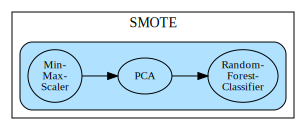

In [9]:
print(accuracy_score(test_y, predictions))
best_estimator = trained_optimizer.get_pipeline()
best_estimator.visualize()

### Under-sampling from imbalanced-learn

In [10]:
pipeline_with_correction =  CondensedNearestNeighbour(operator = MinMaxScaler() >> PCA() >> RandomForestClassifier())
optimizer = Hyperopt(estimator=pipeline_with_correction, max_evals = 10, scoring='roc_auc')
trained_optimizer = optimizer.fit(np.array(train_X), np.array(train_y))
predictions = trained_optimizer.predict(test_X)
trained_optimizer.summary()

100%|██████████| 10/10 [00:28<00:00,  2.87s/trial, best loss: -0.665297478599759]


,tid,loss,time,log_loss,status
name,,,,,
p0,0,NaN,NaN,NaN,fail
p1,1,-0.620197,0.618775,0.637794,ok
p2,2,-0.618310,0.651479,0.634385,ok
p3,3,-0.629734,0.579852,0.627842,ok
p4,4,-0.665297,0.738103,0.644552,ok
p5,5,NaN,NaN,NaN,fail
p6,6,-0.500000,0.790457,0.650936,ok
p7,7,NaN,NaN,NaN,fail
p8,8,-0.500000,0.600954,0.651208,ok


0.6421052631578947


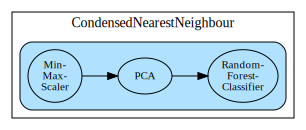

In [11]:
print(accuracy_score(test_y, predictions))
best_estimator = trained_optimizer.get_pipeline()
best_estimator.visualize()

### Combined over and under sampling from imbalanced-learn

In [12]:
pipeline_with_correction =  SMOTEENN(operator = MinMaxScaler() >> PCA() >> RandomForestClassifier())
optimizer = Hyperopt(estimator=pipeline_with_correction, max_evals = 10, scoring='roc_auc')
trained_optimizer = optimizer.fit(np.array(train_X), np.array(train_y))
predictions = trained_optimizer.predict(test_X)
trained_optimizer.summary()

100%|██████████| 10/10 [00:20<00:00,  2.04s/trial, best loss: -0.6697127399852649]


,tid,loss,time,log_loss,status
name,,,,,
p0,0,NaN,NaN,NaN,fail
p1,1,-0.622121,0.410015,0.890017,ok
p2,2,-0.617132,0.407055,3.463371,ok
p3,3,-0.635959,0.374980,3.379093,ok
p4,4,-0.568382,0.506785,0.993301,ok
p5,5,NaN,NaN,NaN,fail
p6,6,-0.500000,0.540639,0.986296,ok
p7,7,NaN,NaN,NaN,fail
p8,8,-0.500000,0.539346,1.009724,ok


0.4842105263157895


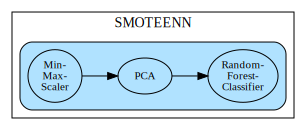

In [13]:
print(accuracy_score(test_y, predictions))
best_estimator = trained_optimizer.get_pipeline()
best_estimator.visualize()